## The Weather Dataset

###### Here, The Weather Dataset is a time series data set with per hour information about the weather conditions at a particular location situated at Cork, Ireland at station Roches Point since 2004. It records Precipitation Amount(mm), Air Temperature(C), Dew Point Temperature, Relative Humidity(%), Mean Wind Speed(kt), Visibility, Mean Sea Level Pressure(hPa), and Predominant Wind Direction(deg). I analyzed this data set with Pandas. 
###### Station Height: 40 M 	
###### Latitude:51.793 / Longitude: -8.244
###### Source data: www.met.ie (Met Éireann)

### Import Libraries

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", 1000) 

### Data Acquisition and Collection
###### Acquire the necessary data from historical_hourly_weather.csv

In [2]:
data = pd.read_csv("../data/historical_hourly_weather.csv")
data.head()

/home/felipe/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3508: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,date,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir
0,01-dec-1955 01:00,0.0,10.7,10.0,9.4,11.8,91,1002.1,16,170
1,01-dec-1955 02:00,2.9,9.8,9.7,10.0,12.0,99,1001.8,11,190
2,01-dec-1955 03:00,3.8,9.7,9.5,9.4,11.7,97,1001.7,9,160
3,01-dec-1955 04:00,0.8,9.8,9.7,9.4,11.9,98,1001.6,5,140
4,01-dec-1955 05:00,0.3,8.9,8.7,8.3,11.1,97,1001.6,12,330


### Data Preprocessing
###### Converted the 'rain' column to numeric format and if any errors occur during conversion, coerce them.
###### Performed linear interpolation for all columns for handling missing values in our time series data with the method=‘pad’ that Filled in NaNs using existing values.

In [3]:
# Convert the 'rain' column to numeric format and if any errors occur during conversion, coerce them 
data = data.assign(
    date=pd.to_datetime(data["date"]),
    rain=pd.to_numeric(data["rain"], errors="coerce"),
    temp=pd.to_numeric(data["temp"], errors="coerce"),
    wetb=pd.to_numeric(data["wetb"], errors="coerce"),
    dewpt=pd.to_numeric(data["dewpt"], errors="coerce"),
    vappr=pd.to_numeric(data["vappr"], errors="coerce"),
    rhum=pd.to_numeric(data["rhum"], errors="coerce"),
    msl=pd.to_numeric(data["msl"], errors="coerce"),
    wdsp=pd.to_numeric(data["wdsp"], errors="coerce"),
    wddir=pd.to_numeric(data["wddir"], errors="coerce")
)

# Performed linear interpolation for all columns for handling missing values in our time series data
data_interpolated = data.interpolate(method="pad")

# To count the number of missing values and proceed with imputation or removal as needed
print(f"Overview of how many null values exist in each column: {data_interpolated.isnull().sum()}\n")

# Listing unique values
print(f"Listing unique values inside columns: {data_interpolated.nunique()}\n")
print(f"Listing unique values inside column 'rhum': {data_interpolated['rhum'].unique()}\n")
print(f"Listing unique values inside column 'wdsp': {data_interpolated['wdsp'].unique()}\n")
print(f"Listing unique values inside column 'wddir': {data_interpolated['wddir'].unique()}\n")

Overview of how many null values exist in each column: date     0
rain     0
temp     0
wetb     0
dewpt    0
vappr    0
rhum     0
msl      0
wdsp     0
wddir    0
dtype: int64

Listing unique values inside columns: date     578255
rain        140
temp        327
wetb        281
dewpt       305
vappr       209
rhum         76
msl         939
wdsp         60
wddir        37
dtype: int64

Listing unique values inside column 'rhum': [ 91.  99.  97.  98.  96.  89.  92.  95.  87.  83.  86.  85.  93.  94.
 100.  84.  80.  79.  81.  90.  88.  76.  75.  71.  82.  70.  69.  68.
  73.  77.  74.  78.  63.  62.  65.  60.  58.  66.  64.  72.  67.  61.
  59.  53.  52.  57.  56.  55.  49.  48.  54.  51.  47.  45.  50.  46.
  42.  37.  39.  44.  40.  35.  43.  41.  38.  31.  22.  21.  36.  34.
  33.  32.  30.  28.   0.  29.]

Listing unique values inside column 'wdsp': [16. 11.  9.  5. 12. 15. 13. 14.  7.  4.  3.  6.  1.  0. 21. 19. 23. 22.
 20.  8.  2. 17. 18. 10. 25. 29. 26. 24. 27. 28. 30. 31. 36.

### Exploratory Data Analysis (EDA)
###### Explore and analyze the dataset to understand its key characteristics

In [8]:
print(f"Shape: {data_interpolated.shape}\n")
print(f"Index: {data_interpolated.index}\n")
print(f"Columns: {data_interpolated.columns}\n")
print(f"Data Type each column: {data_interpolated.dtypes}\n")
print(f"Total of non-null values: {data_interpolated.count()}\n")
print(f"Basic Information: {data_interpolated.info()}\n")
print(f"Overview of how many null values exist in each column: {data_interpolated.isnull().sum()}\n")
print(f"Listing unique values inside columns: {data_interpolated.nunique()}\n")
print(f"Listing unique values inside column 'rhum': {data_interpolated['rhum'].unique()}\n")
print(f"Listing unique values inside column 'wdsp': {data_interpolated['wdsp'].unique()}\n")
print(f"Listing unique values inside column 'wddir': {data_interpolated['wddir'].unique()}\n")

Shape: (578255, 10)

Index: RangeIndex(start=0, stop=578255, step=1)

Columns: Index(['date', 'rain', 'temp', 'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'wdsp',
       'wddir'],
      dtype='object')

Data Type each column: date     datetime64[ns]
rain            float64
temp            float64
wetb            float64
dewpt           float64
vappr           float64
rhum            float64
msl             float64
wdsp            float64
wddir           float64
dtype: object

Total of non-null values: date     578255
rain     578255
temp     578255
wetb     578255
dewpt    578255
vappr    578255
rhum     578255
msl      578255
wdsp     578255
wddir    578255
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578255 entries, 0 to 578254
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    578255 non-null  datetime64[ns]
 1   rain    578255 non-null  float64       
 2   temp    578255 non-null  fl

##### Question 1
###### Find the numbers of time that when the 'wdsp' Mean Wind Speed (kt) is greater than 40km/h

In [5]:
wind_km_per_hour = 40
high_wind = data_interpolated[data_interpolated['wdsp'] > wind_km_per_hour]['wdsp'].count()

# Filter the DataFrame where wdsp is greater than 30
filtered_data = data_interpolated[data_interpolated['wdsp'] > wind_km_per_hour]

# Calculate the percentage
percentage_high_wind = (len(filtered_data) / len(data_interpolated)) * 100

print(f"Number of times when Mean Wind Speed (kt) is greater than 40: {high_wind}")
print(f"Percentage of time when 'wdsp' is greater than 40: {percentage_high_wind:.2f}%")
print(f"First five temperatures:\n{data_interpolated['wdsp'].value_counts().head()}")

Number of times when Mean Wind Speed (kt) is greater than 40: 462
Percentage of time when 'wdsp' is greater than 40: 0.08%
First five temperatures:
0.0     80309
10.0    32256
9.0     31634
11.0    31287
8.0     30594
Name: wdsp, dtype: int64


##### Question 2
###### What is the mean "Air Temperature" in 2023?

Mean Air Temperature in 2023: 11.54820226001598


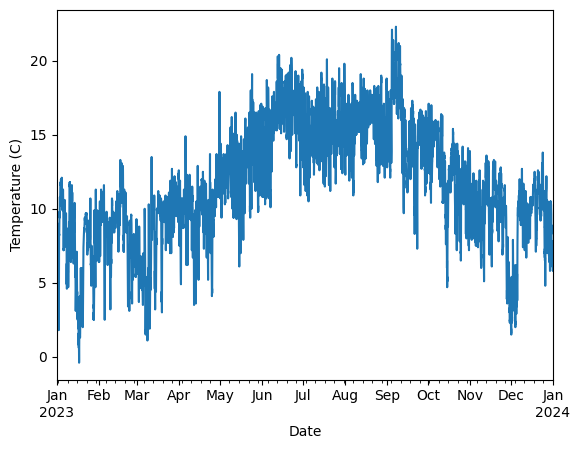

,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir
date,,,,,,,,,
2023-01-01 00:00:00,0.1,6.9,6.2,5.3,8.9,89.0,996.5,9.0,250.0
2023-01-01 01:00:00,0.1,7.1,6.3,5.3,8.9,88.0,996.9,6.0,210.0
2023-01-01 02:00:00,0.0,8.7,7.6,6.4,9.6,85.0,996.7,10.0,220.0
2023-01-01 03:00:00,0.6,7.3,6.5,5.4,9.0,87.0,997.3,14.0,220.0
2023-01-01 04:00:00,0.0,8.4,7.4,6.2,9.5,86.0,997.0,12.0,210.0
...,...,...,...,...,...,...,...,...,...
2023-12-31 20:00:00,0.0,7.1,5.7,3.8,8.0,79.0,997.2,21.0,280.0
2023-12-31 21:00:00,0.0,6.9,5.3,3.2,7.7,77.0,998.1,18.0,270.0
2023-12-31 22:00:00,0.0,6.5,4.9,2.8,7.5,77.0,999.3,13.0,260.0


In [36]:
df_2023 = data[(data["date"] >= "2023-01-01") & (data["date"] <= "2024-01-01")]
mean_air_temperature_2023 = df_2023["temp"].mean()
print("Mean Air Temperature in 2023:", mean_air_temperature_2023)

df_2023.set_index("date", inplace=True)
df_2023["temp"].plot()
plt.xlabel('Date')
plt.ylabel('Temperature (C)')

# Display the plot
plt.show()
df_2023

##### Question 3
###### What is the Standard Deviation of "Vapour Pressure" in this data?

In [17]:
vapour_pressure_std = data_interpolated["vappr"].std()
print(f"The Standard Deviation of Vapour Pressure: {vapour_pressure_std}")

The Standard Deviation of Vapour Pressure: 3.3276644755315608


##### Question 4
###### What is the Variance of "Relative Humidity (%)" in this data?

In [16]:
relative_humidity_variance = data_interpolated["vappr"].var()
print(f"The Variance of Relative Humidity: {relative_humidity_variance}")

The Variance of Relative Humidity: 11.073350861714738


### Feature Engineering
###### The function 'get_weather_condition' serves to determine the weather condition based on the values provided in a row of data such as "rain", "temp", "rhum", "dewpt" and "wdsp".

In [24]:
# Define conditions based on the parameters
def get_weather_condition(row):
    if row["rain"] > 0:
        return "Rainy"
    elif row["rhum"] > 80 and row["temp"] < 10:
        return "Foggy"
    elif row["rhum"] > 70 and row["dewpt"] > 10:
        return "Humid"
    elif row["wdsp"] > 30:
        return "Windy"
    else:
        return "Clear"

# Add the weather conditions as a new column to dataset
data_interpolated["weather_condition"] = data_interpolated.apply(get_weather_condition, axis=1)
data_interpolated.head()

,date,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,weather_condition
0,1955-12-01 01:00:00,0.0,10.7,10.0,9.4,11.8,91.0,1002.1,16.0,170.0,Clear
1,1955-12-01 02:00:00,2.9,9.8,9.7,10.0,12.0,99.0,1001.8,11.0,190.0,Rainy
2,1955-12-01 03:00:00,3.8,9.7,9.5,9.4,11.7,97.0,1001.7,9.0,160.0,Rainy
3,1955-12-01 04:00:00,0.8,9.8,9.7,9.4,11.9,98.0,1001.6,5.0,140.0,Rainy
4,1955-12-01 05:00:00,0.3,8.9,8.7,8.3,11.1,97.0,1001.6,12.0,330.0,Rainy


##### Question 5
###### What is the Mean of each column against each "Weather Condition"?

In [25]:
data_interpolated.groupby("weather_condition").mean()

,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir
weather_condition,,,,,,,,,
Clear,0.00000,10.239541,8.241430,5.951889,9.611457,75.537834,1016.389697,11.306122,196.505900
Foggy,0.00000,5.816256,5.353647,4.379628,8.870025,89.127046,1013.866708,9.097954,195.333398
Humid,0.00000,14.515475,13.496583,12.691537,14.698347,89.089743,1015.962002,8.613326,166.229553
Rainy,0.82196,9.682648,9.217332,8.594382,11.622520,92.302979,1005.481826,16.358958,187.381925
Windy,0.00000,9.548593,7.485779,5.051895,9.076285,74.845779,1001.023715,34.163227,260.863039


##### Question 6
###### What is the Minimum and Maximum of each column against each "Weather Condition"?

In [27]:
data_interpolated.groupby("weather_condition").min()

,date,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir
weather_condition,,,,,,,,,,
Clear,1955-12-01 01:00:00,0.0,-6.8,-49.0,-11.8,0.0,0.0,947.1,0.0,0.0
Foggy,1955-12-01 08:00:00,0.0,-6.5,-49.0,-17.7,3.1,81.0,951.3,0.0,0.0
Humid,1955-12-02 18:00:00,0.0,0.0,0.0,10.1,6.6,71.0,963.8,0.0,0.0
Rainy,1955-12-01 02:00:00,0.1,-6.5,-6.8,-17.7,0.0,0.0,943.2,0.0,0.0
Windy,1956-01-01 08:00:00,0.0,1.6,-0.8,-7.0,0.0,0.0,950.3,31.0,80.0


In [28]:
data_interpolated.groupby("weather_condition").max()

,date,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir
weather_condition,,,,,,,,,,
Clear,2024-01-31 17:00:00,0.0,27.0,21.1,18.9,21.8,100.0,1048.3,30.0,360.0
Foggy,2024-02-01 00:00:00,0.0,9.9,17.2,16.2,19.1,100.0,1048.7,62.0,360.0
Humid,2024-01-31 18:00:00,0.0,24.5,23.7,20.4,23.9,100.0,1040.8,49.0,360.0
Rainy,2024-01-31 19:00:00,24.5,22.7,19.6,19.1,22.1,100.0,1048.4,59.0,360.0
Windy,2024-01-23 21:00:00,0.0,19.2,15.9,13.3,16.3,97.0,1034.1,59.0,360.0
